<a href="https://colab.research.google.com/github/EisaacJC/Ciencia-de-Datos-Personal/blob/master/Descensoxelgrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facultad de Física UV

<img align="left" style="padding-right:10px;" src="https://www.uv.mx/ffia/files/2012/09/playerLogo2.jpg">



Descripción del problema matemático, consideremos una función costo, con el objetivo de encontrar los extremos de ésta función derivamos parcialmente respecto a las componentes de la función, haciendo uso de la hipótesis lineal


<b>Función Costo</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Derivada de la función costo con respecto de las variables $\theta_i$ </b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Expresión numérica para cada "gradiente" </b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

# Importación de librerías y lectura de bases de datos

In [0]:
#importando librerias
#!pip install pandas
#!pip install pandas.compat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from pandas.compat import StringIO
%matplotlib inline

In [0]:
#Adqusición de datos:
#datos entrenamiento
dent=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/DCI/master/datosEntrenamiento.csv?token=ACRPZCPCCRSVX2HGD4RH5RC56FTNS",names=["x0","x1","x2","x3","y"], delim_whitespace= False, header= None)
#datos prueba
dprp=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/DCI/master/datosPrueba.csv?token=ACRPZCPZQCVZLPD6IQ2VFKK56FTXQ",names=["x0","x1","x2","x3","y"], delim_whitespace= False, header= None)
#datos validacion
dval=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/DCI/master/datosPrueba.csv?token=ACRPZCMUNUK5L33AHNILABC56FUBQ",names=["x0","x1","x2","x3","y"], delim_whitespace= False, header= None)


#dent=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/Ciencia-de-Datos-Personal/master/data.csv",names=["x0","x1","x2"])

In [215]:
#Visualizar las dimensionnes de las bases de datos
"""print(dent.shape)
print(dprb.shape)
print(dval.shape)
print (dent)"""

'print(dent.shape)\nprint(dprb.shape)\nprint(dval.shape)\nprint (dent)'

# Visualización de la base de datos, para ver posibles correlaciones

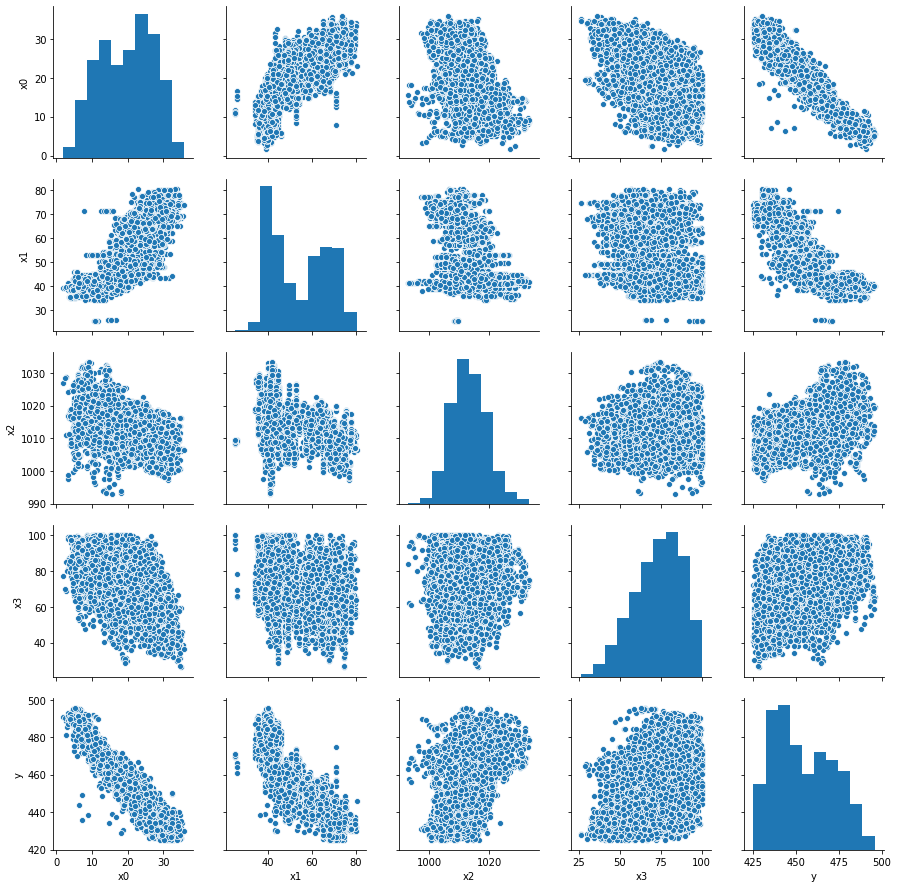

In [216]:
sns.pairplot(data=dent);

# Definición de funciones:


In [0]:
#Costo
def calcula_costo(X,y,theta):
    sumax = np.power(((X @ theta.T)-y),2)
    return np.sum(sumax)/(2 * len(X))


In [0]:
#Descenso
def descenso(X,y,theta,iters,alpha):
    costo = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        costo[i] = calcula_costo(X, y, theta)
    
    return theta,costo


In [219]:
m=y.shape[0]
print(m)
print(len(X))

6698
6698


# Entrenamiento

In [0]:
dent = (dent - dent.mean())/dent.std()

#dent.head()
#Creando las matrices de dat0s
X = dent.iloc[:,0:4]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)# Concatenando las primeras cuatro columnas
#en nuestra matriz
y = dent.iloc[:,4:5].values #Ponienndo la quinta en Y
theta = np.zeros([1,5])#Generando el vector de thetas
#Ajustando parámetros
alpha = 0.01
iters = 1000

In [221]:
#Ejecutando el descenso por el gradiente y la función costo
g,costo = descenso(X,y,theta,iters,alpha)
print(g)
costo_final = calcula_costo(X,y,g)
#print(costo_final)

[[ 7.27692622e-14 -7.01834445e-01 -2.92189133e-01  5.55910645e-02
  -8.19942977e-02]]


Text(0.5, 1.0, 'Error contra entrenamiento')

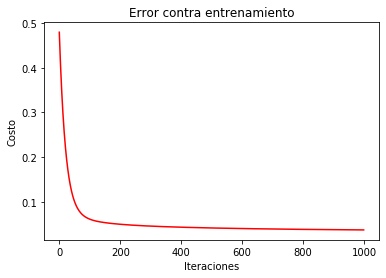

In [222]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), costo, 'r')  
ax.set_xlabel('Iteraciones')  
ax.set_ylabel('Costo')  
ax.set_title('Error contra entrenamiento')  

# Datos Prueba

[[ 5.92008444e-18 -7.01834445e-01 -2.92189133e-01  5.55910645e-02
  -8.19942977e-02]]
0.037306264798396625


Text(0.5, 1.0, 'Error contra entrenamiento')

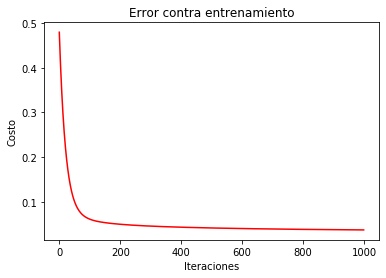

In [223]:
dprb = (dprb - dprb.mean())/dprb.std()
#dprb.head()
#Creando las matrices de dat0s
Xp = dprb.iloc[:,0:4]
ones = np.ones([X.shape[0],1])
Xp = np.concatenate((ones,Xp),axis=1)# Concatenando las primeras cuatro columnas
#en nuestra matriz
yp = dprb.iloc[:,4:5].values #Ponienndo la quinta en Y
#theta = np.zeros([1,5])#Generando el vector de thetas
#Ejecutando el descenso por el gradiente y la función costo
g,costo = descenso(Xp,yp,theta,iters,alpha)
print(g)
costo_final = calcula_costo(Xp,yp,g)
print(costo_final)
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), costo, 'r')  
ax.set_xlabel('Iteraciones')  
ax.set_ylabel('Costo')  
ax.set_title('Error contra entrenamiento')  

# Datos Validacion

[[ 5.92008444e-18 -7.01834445e-01 -2.92189133e-01  5.55910645e-02
  -8.19942977e-02]]
0.037306264798396625


Text(0.5, 1.0, 'Error contra entrenamiento')

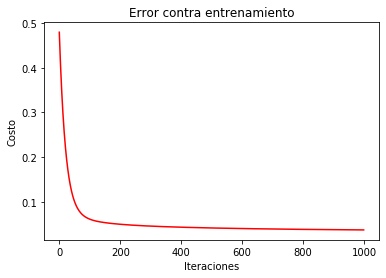

In [224]:
dval = (dval - dval.mean())/dval.std()
#dval.head()
#Creando las matrices de dat0s
Xv = dprb.iloc[:,0:4]
ones = np.ones([X.shape[0],1])
Xv = np.concatenate((ones,Xv),axis=1)# Concatenando las primeras cuatro columnas
#en nuestra matriz
yv = dprb.iloc[:,4:5].values #Ponienndo la quinta en Y
#theta = np.zeros([1,5])#Generando el vector de thetas
#Ejecutando el descenso por el gradiente y la función costo
g,costo = descenso(Xv,yv,theta,iters,alpha)
print(g)
costo_final = calcula_costo(Xv,yv,g)
print(costo_final)
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), costo, 'r')  
ax.set_xlabel('Iteraciones')  
ax.set_ylabel('Costo')  
ax.set_title('Error contra entrenamiento')  

# OLS

In [225]:
from statsmodels.formula.api import ols
model = ols("y ~ x0 + x1 + x2 + x3 ", dent).fit()
print(model.summary())
theta_ols = np.array(model.params)
theta_ols

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.228e+04
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        06:45:59   Log-Likelihood:                -590.36
No. Observations:                6698   AIC:                             1191.
Df Residuals:                    6693   BIC:                             1225.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.683e-14      0.003   2.38e-11      1.0

array([ 7.68345890e-14, -8.67955033e-01, -1.70061130e-01,  2.39296709e-02,
       -1.37330940e-01])

# Sci-kit

In [0]:
Yval=X.dot(theta_ols)
Yval2=X.dot(g[0])

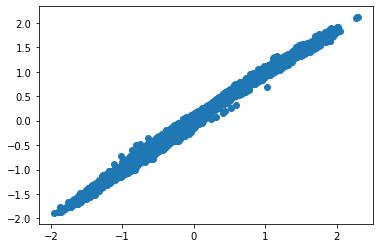

In [227]:
plt.scatter(Yval, Yval2)